# Question 1 - Bootstrap, Jackknife, Confidence Interval

In [12]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import scipy.stats

In [13]:

data = pd.read_csv(r"C:\Users\anmol\Downloads\mtcars.csv")
## r before your normal string helps it to convert normal string to raw string 

In [14]:
print(data.values)
data.sort_values(by =['mpg','Cars'], ascending=[True,True])


data.describe()

[['Mazda RX4' 21.0]
 ['Mazda RX4 Wag' 21.0]
 ['Datsun 710' 22.8]
 ['Hornet 4 Drive' 21.4]
 ['Hornet Sportabout' 18.7]
 ['Valiant' 18.1]
 ['Duster 360' 14.3]
 ['Merc 240D' 24.4]
 ['Merc 230' 22.8]
 ['Merc 280' 19.2]
 ['Merc 280C' 17.8]
 ['Merc 450SE' 16.4]
 ['Merc 450SL' 17.3]
 ['Merc 450SLC' 15.2]
 ['Cadillac Fleetwood' 10.4]
 ['Lincoln Continental' 10.4]
 ['Chrysler Imperial' 14.7]
 ['Fiat 128' 32.4]
 ['Honda Civic' 30.4]
 ['Toyota Corolla' 33.9]
 ['Toyota Corona' 21.5]
 ['Dodge Challenger' 15.5]
 ['AMC Javelin' 15.2]
 ['Camaro Z28' 13.3]
 ['Pontiac Firebird' 19.2]
 ['Fiat X1-9' 27.3]
 ['Porsche 914-2' 26.0]
 ['Lotus Europa' 30.4]
 ['Ford Pantera L' 15.8]
 ['Ferrari Dino' 19.7]
 ['Maserati Bora' 15.0]
 ['Volvo 142E' 21.4]]


,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


In [15]:
# Resampling from our dataset
from sklearn.utils import resample
boot = resample(data.iloc[:,1:2], replace=False, n_samples=32, random_state=1)


In [16]:
import math
import numpy
import numpy.random
def __array_mean_indices(a, indices, func_axis=None, dtype=None):

    if func_axis == None:
        return (numpy.mean(a.flat[indices], dtype=dtype), )
    else:
        return tuple(numpy.mean(numpy.reshape(numpy.take(a, [j,], axis=func_axis), -1)[indices]) for j in range(a.shape[func_axis]))

def __number_measurements(a, func_axis=None):
    """ Calculates the number of measurements of an array from the array and the function axis.
    """
    if func_axis == None:
        return a.size
    else:
        return a.size / a.shape[func_axis]

def identity(x):
    """
    Identity function used as default function in the resampling methods.

    """
    return x

def bootstrap(a, iterations, func=identity, func_axis=None, dtype=None):
   
    # Calculate the number of measurements
    n = __number_measurements(a, func_axis)
    # Evaluate the function on the bootstrap means
    bootstrap_values = [func(*(__array_mean_indices(a, numpy.random.randint(0, high=n, size=n), func_axis=func_axis, dtype=dtype))) for i in range(iterations)]

    # Return the average value and the error of this averaged value
    return numpy.mean(bootstrap_values), math.sqrt(float(iterations)/float(iterations - 1))*numpy.std(bootstrap_values)
    print (numpy.std(bootstrap_values))

In [17]:
bootstrap(boot.values, 100, func=identity, func_axis=None, dtype=None) 

(20.20540625, 1.0715566600154287)

In [18]:
z = np.mean(boot.values)
v = np.std(boot.values)
print("The sample mean and std deviation is:->",z,v)

The sample mean and std deviation is:-> 20.090625 5.932029552301218


In [19]:
CV = np.sqrt(np.var(boot))/np.mean(boot)
print(CV)
#Another way to obtain coeffiecient of variation is shown below:
b_cov = scipy.stats.variation(boot)
print(b_cov)

mpg    0.295264
dtype: float64
[0.29526356]


In [20]:
a= np.mean(boot)
N=32
bias =(a - CV)/N
print(bias)


mpg    0.618605
dtype: float64


In [21]:
n=32
se =  np.std(boot) / n
print("Std error of this sample is:", se)

Std error of this sample is: mpg    0.185376
dtype: float64


In [22]:

mean_a, error_a = bootstrap(boot.values, 100)
print(mean_a,error_a)
#error_a is se_hat and se is se_that

19.971499999999995 1.061330245862629


In [23]:

(mean_a > 34, mean_a < 10)

(False, False)

In [24]:
(error_a > 2.0/math.sqrt(1000 - 1) - 0.01, error_a < 2.0/math.sqrt(1000 - 1) + 0.01)

(True, False)

In [25]:
import numpy as np
from astropy.stats import jackknife_resampling
d = boot.values

In [26]:
resamples = jackknife_resampling(d)
resamples


array([[21.4, 15.2, 30.4, 13.3, 32.4, 15.5, 15.8, 33.9, 10.4, 19.2, 17.8,
        21.5, 26. , 18.7, 22.8, 27.3, 14.3, 15.2, 24.4, 19.7, 21. , 14.7,
        21. , 10.4, 21.4, 15. , 19.2, 22.8, 17.3, 16.4, 18.1],
       [30.4, 15.2, 30.4, 13.3, 32.4, 15.5, 15.8, 33.9, 10.4, 19.2, 17.8,
        21.5, 26. , 18.7, 22.8, 27.3, 14.3, 15.2, 24.4, 19.7, 21. , 14.7,
        21. , 10.4, 21.4, 15. , 19.2, 22.8, 17.3, 16.4, 18.1],
       [30.4, 21.4, 30.4, 13.3, 32.4, 15.5, 15.8, 33.9, 10.4, 19.2, 17.8,
        21.5, 26. , 18.7, 22.8, 27.3, 14.3, 15.2, 24.4, 19.7, 21. , 14.7,
        21. , 10.4, 21.4, 15. , 19.2, 22.8, 17.3, 16.4, 18.1],
       [30.4, 21.4, 15.2, 13.3, 32.4, 15.5, 15.8, 33.9, 10.4, 19.2, 17.8,
        21.5, 26. , 18.7, 22.8, 27.3, 14.3, 15.2, 24.4, 19.7, 21. , 14.7,
        21. , 10.4, 21.4, 15. , 19.2, 22.8, 17.3, 16.4, 18.1],
       [30.4, 21.4, 15.2, 30.4, 32.4, 15.5, 15.8, 33.9, 10.4, 19.2, 17.8,
        21.5, 26. , 18.7, 22.8, 27.3, 14.3, 15.2, 24.4, 19.7, 21. , 14.7,
        

In [27]:
x = scipy.stats.variation


In [28]:
def jackknife_resampling(data):
    n = data.shape[0]
    assert n > 0, "data must contain at least one measurement"

    resamples = np.empty([n, n-1])

    for i in range(n):
        resamples[i] = np.delete(data, i)

    return resamples

def jackknife_stats(data, statistic, conf_lvl=0.95):
    stat_data = statistic(data)
    jack_stat = np.apply_along_axis(statistic, 1, resamples)
    mean_jack_stat = np.mean(jack_stat, axis=0)
    # jackknife bias
    bias = (n-1)*(mean_jack_stat - stat_data)

    # jackknife standard error
    std_err = np.sqrt((n-1)*np.mean((jack_stat - mean_jack_stat)*(jack_stat -
                                    mean_jack_stat), axis=0))

    # bias-corrected "jackknifed estimate"
    estimate = stat_data - bias
    # jackknife confidence interval
    assert (conf_lvl > 0 and conf_lvl < 1), "confidence level must be in (0,1)."
    z_score = np.sqrt(2.0)*erfinv(conf_lvl)
    conf_interval = estimate + z_score*np.array((-std_err, std_err))

    return estimate, bias, std_err, conf_interval

In [29]:
 from scipy.special import erfinv
jackknife_stats(resamples,np.std, conf_lvl=0.95)


(6.075658514972499,
 -0.143628962671281,
 0.753809543883037,
 array([4.59821896, 7.55309807]))

In [30]:
jackknife_stats(resamples,np.mean, conf_lvl=0.95)

(20.090625000000223,
 -2.2026824808563106e-13,
 1.065423959372812,
 array([18.00243241, 22.17881759]))

In [31]:
jackknife_stats(d,x, conf_lvl=0.95)

(array([0.30256309]),
 array([-0.00729953]),
 0.033086437178220435,
 array([0.23771487, 0.36741132]))

In [32]:
# estimate   ---> (array([0.30256309]), ,  array([0.23771487, 0.36741132]))
# bias       ---> array([-0.00729953])
# std_error  ---> 0.033086437178220435,
# conf_interval--->array([0.23771487, 0.36741132]))

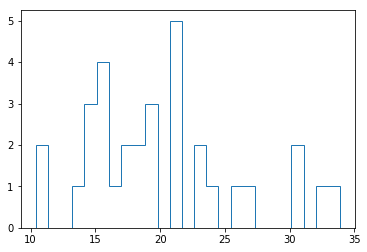

In [33]:

plt.hist(d, 25, histtype='step');

In [34]:

def mean_confidence_interval(sample, confidence=0.95):
    a = 1.0 * np.array(sample)
    n = len(d)
    m, se = np.mean(d), scipy.stats.sem(d)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h


In [35]:
mean_confidence_interval(resamples, confidence=0.95)

(20.090625, array([17.91767851]), array([22.26357149]))

In [36]:

np.percentile(resamples, 0.95)

10.4

In [37]:
scipy.stats.mstats.mquantiles (resamples,0.95)

array([32.4])

In [38]:
scipy.stats.mstats.mquantiles (resamples,0.05)

array([10.4])

# Question 2 - One class SVM- LSSVD

In [39]:
import pandas as pd
import numpy as np


In [40]:
data = pd.read_csv(r"C:\Users\anmol\Downloads\charlie1.csv")
X = data[['z1','z2']]
y = data['Data']

y_out = np.array(y[20:])
x_out = np.array(X[20:])

y = y[0:20]
X = X[0:20]

X = np.array(X)
y = np.array(y)



In [41]:
def Kernel(x, y, sigma):
    return np.exp(-np.linalg.norm(x-y)**2 / ( (sigma ** 2)))

def Gram_Matrix(x):
    K = np.zeros((len(x),len(x)))
    for i in range(0, len(x)):
        for j in range(0, len(x)):
            K[i, j] = Kernel(x[i], x[j], sigma)
            
    return K

def H(x):
    mat = np.zeros((len(x), len(x)))
    mat[0:len(x), 0:len(x)] = Gram_Matrix(x) + np.eye(len(x))/2*C
    return mat

def alpha():
    p1 = np.dot(np.dot(np.linalg.inv(H_mat), e.T),k)
    p2 = np.dot(np.dot(np.linalg.inv(H_mat), e.T), e)
    p3 = (2-p1)/p2
    p3 = k + np.dot(p3, e)
    a = 0.5*np.dot(np.linalg.inv(H_mat),p3)
    return a



In [42]:
e = np.ones(len(X))
k = np.zeros((len(X)))

sigma = 0.125
C = 1


for j in range(0, len(X)):
    k[j] = Kernel(X[j], X[j], sigma)
    

In [43]:
H_mat = H(X)
al = alpha()

In [44]:
def R_square():
    p1 = 0
    p2 = 0
    total = 0
    for s in range(0, len(X)):
        k = Kernel(X[s], X[s], sigma)
        for j in range(0, len(X)):
            p1 = p1 + al[j]*Kernel(X[s], X[j], sigma)
            for l in range(0, len(X)):
                p2 = p2 + al[j]*al[l]*Kernel(X[j], X[l], sigma)
        total = total + (k - 2 * p1 + p2)
    final = total/len(X)
    return final
    total_new[i]= total - X[i]
    return total_new

final = R_square()

In [45]:
final

0.46323714966335905

In [46]:

def classification(x):
    t_out = []
    t_in = []
    p = 0
    p1 = 0
    for z in range(0, len(x)):
        k = Kernel(x[z], x[z], sigma)    
        for j in range(0, len(X)):
            p = p + al[j]*Kernel(x, X[j], sigma)
            for l in range(0, len(X)):
                p1 = p1 + al[j]*al[l]*Kernel(X[j], X[l], sigma)
        d = k - 2*p + p1
        if d <= final:
            t_in.append(x[z])
        else:
            t_out.append(x[z])

    return t_out, t_in

t_out, t_in = classification(x_out)

In [47]:
t_out

[array([0.074196, 0.239359]),
 array([-1.51756, -0.21121]),
 array([ 1.408476, -0.87591 ]),
 array([ 6.298001, -3.67398 ]),
 array([ 3.802025, -1.99584 ]),
 array([ 6.490673, -2.73143 ]),
 array([ 2.738829, -1.37617 ]),
 array([ 4.958747, -3.94851 ]),
 array([ 5.678092, -3.85838 ]),
 array([ 3.369657, -2.10878 ])]

In [48]:
t_in

[]

In [49]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

clf = svm.OneClassSVM(kernel = 'rbf', gamma = 'auto')
clf.fit(t_out, t_in)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [50]:
clf.predict(t_out)

array([-1, -1,  1, -1,  1, -1, -1, -1,  1,  1], dtype=int64)

In [51]:
n_error_outliers = t_out[t_out == 1].size
print("Number of errors = ",n_error_outliers,"/",y_out.size)
#classification rate
rate = n_error_outliers/y_out.size
print("Classification rate = ",100*(1-rate),"%")

Number of errors =  2 / 10
Classification rate =  80.0 %


In [61]:
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(),0, 20), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')

s = 70 #Size of blobs
b1 = plt.scatter(X[:, 0], X[:, 1], c='white', s=s, edgecolors='k')
c = plt.scatter(x_out[:, 0], x_out[:, 1], c='gold', s=s,
                edgecolors='k')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, c],
           [ "training observations",
             "outliers"],
           loc="upper left",
           prop=mp.font_manager.FontProperties(size=11))
plt.show()

NameError: name 'xx' is not defined

In [52]:

df = pd.DataFrame(t_out)

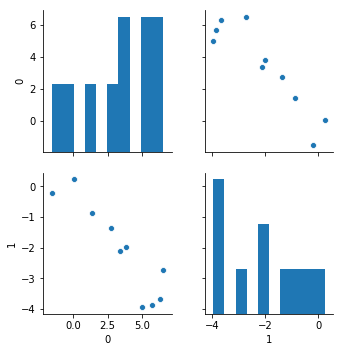

In [53]:
import seaborn as sns
sns.pairplot(df)


This shows that all t_out i.e outliers  and y_out = New points are detected as anomaly and shown below at -1,0 
Rest all points are not shown as they appear to be inside the circle of radius = final =0.47 and are not counted as anomaly i.e why we have t_in as empty set for any -1 value.


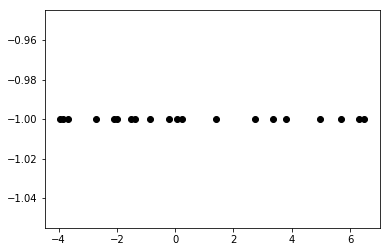

In [54]:
l = df.iloc[0:,1:2]
x = np.linspace(0, 10, 10)
y = l
plt.plot(t_out, y_out, 'o', color='black');

print("This shows that all t_out i.e outliers  and y_out = New points are detected as anomaly and shown below at -1,0 ")
print("Rest all points are not shown as they appear to be inside the circle of radius = final =0.47 and are not counted as anomaly i.e why we have t_in as empty set for any -1 value.")

# Question 3 - Acceptance Rejection Sampling

In [55]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [56]:
i = 0
k = 0
n = 1000
z = np.random.uniform(0,1,n)
while i<n:
    u = np.random.uniform(0,1,1)
    y = np.random.exponential(scale=0.001,size = 1)
    k = k+1
    if u >= np.sqrt(2/math.pi)*np.exp(-y*2/2):
        i = i
    else:
        z[i] = y*(u < np.sqrt(2/math.pi)*np.exp(-y*2/2))
        i += 1
        
print(i, k)



1000 1242


In [57]:
# P= P(Y accepted) =1/c
P=i/k
c = 1/P
print("Bounding Constant is c:", c)

Bounding Constant is c: 1.242


C:\Users\anmol\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


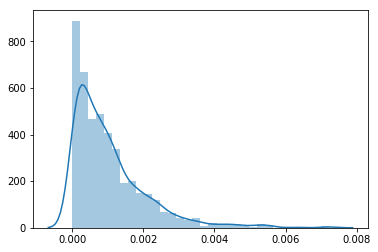

In [58]:
sns.distplot(z, hist = True, kde = True)
plt.show()


The expected number of iterations of the algorithm required until an X is successfully generated is exactly the bounding constant C. In particular, we assume that the ratio f(x)/g(x) is bounded by a constant c > 0. And in practice we would want c as close to 1 as possible.
C = 1.242
λ = scaling parameter i.e scale =0.001 , I have observed that smaller the scale value goes more optimal exponential distribution is generated. So in this case out of all scale values I would consider scale = 0.001 as best parameter for our λ.
scale = 0.001
The percentage of accepted distributed proposals is the k proposals required to generate i proposals for the distribution and based on that we compute the % of the accepted proposals and we deny points below accepted probability to be the part of the normal distribution hence we obtain the positive normals
80.51529790660226
The positive normal distribution values are plotted as follow: 


C:\Users\anmol\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


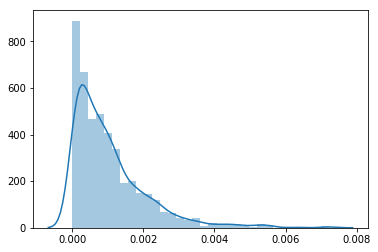

'\nAcceptance-Rejection method\nDenote the density of X by f . This method requires a function g that majorizes f ,\ng(x) ≥ f (x)\nfor all x. Now g will not be a density, since\nc = {-∞, ∞}g(x)dx ≥ 1.\nAssume that c < ∞. Then h(x) = g(x)/c is a density. Algorithm:\n1. Generate Y having density h;\n2. Generate U from U(0, 1), independent of Y ;\n3. If U ≤ f (Y )/g(Y ), then set X = Y ; else go back to step 1.\nThe random variable X generated by this algorithm has density f .\n\nValidity of the Acceptance-Rejection method\nNote\nP(X ≤ x) = P(Y ≤ x|Y accepted).\nNow,\nP(Y ≤ x, Y accepted) ={x,−∞}f (y)/g(y)*h(y)dy =1/c*{x,−∞}f (y)dy,\nand thus, letting x → ∞ gives\nP(Y accepted) =1/c.\nHence,\nP(X ≤ x) =P(Y ≤ x, Y accepted)/P(Y accepted)={x,−∞}f (y)dy.\n\nSource="https://www.win.tue.nl/~marko/2WB05/lecture8.pdf"\n\n\nc=sqrt(2e/π)≈1.32.\nSource ="https://www.scss.tcd.ie/Brett.Houlding/Domain.sites2/sslides5.pdf"\n\n'

In [60]:

"""
Answers:
a) Calculate the optimal constant C for acceptance rejection as a function of  λ.
"""
print("The expected number of iterations of the algorithm required until an X is successfully generated is exactly the bounding constant C. In particular, we assume that the ratio f(x)/g(x) is bounded by a constant c > 0. And in practice we would want c as close to 1 as possible.")
print("C =", c)

"""
b) What is the best parameterλ∈(0,∞) you could use for the proposals.

"""
print("λ = scaling parameter i.e scale =0.001 , I have observed that smaller the scale value goes more optimal exponential distribution is generated. So in this case out of all scale values I would consider scale = 0.001 as best parameter for our λ.")
print("scale = 0.001")
"""
c)  Using  the  optimal λ,  how  many  of  the  generated  exponentially  dis-tributed proposals do you expect to 
    accept (as a percentage)?
"""
print("The percentage of accepted distributed proposals is the k proposals required to generate i proposals for the distribution and based on that we compute the % of the accepted proposals and we deny points below accepted probability to be the part of the normal distribution hence we obtain the positive normals")
print(100-( (k-i)/k)*100)
    
"""
d)Write  Python  codes  to  generate  positive  normals  using  the  Accept-Reject Algorithm.

"""
print("The positive normal distribution values are plotted as follow: ")
sns.distplot(z, hist = True, kde = True)
plt.show()




"""
Acceptance-Rejection method
Denote the density of X by f . This method requires a function g that majorizes f ,
g(x) ≥ f (x)
for all x. Now g will not be a density, since
c = {-∞, ∞}g(x)dx ≥ 1.
Assume that c < ∞. Then h(x) = g(x)/c is a density. Algorithm:
1. Generate Y having density h;
2. Generate U from U(0, 1), independent of Y ;
3. If U ≤ f (Y )/g(Y ), then set X = Y ; else go back to step 1.
The random variable X generated by this algorithm has density f .

Validity of the Acceptance-Rejection method
Note
P(X ≤ x) = P(Y ≤ x|Y accepted).
Now,
P(Y ≤ x, Y accepted) ={x,−∞}f (y)/g(y)*h(y)dy =1/c*{x,−∞}f (y)dy,
and thus, letting x → ∞ gives
P(Y accepted) =1/c.
Hence,
P(X ≤ x) =P(Y ≤ x, Y accepted)/P(Y accepted)={x,−∞}f (y)dy.

Source="https://www.win.tue.nl/~marko/2WB05/lecture8.pdf"


c=sqrt(2e/π)≈1.32.
Source ="https://www.scss.tcd.ie/Brett.Houlding/Domain.sites2/sslides5.pdf"

"""
